In [1]:
########## GEMINI行情接口 ##########
## https://api.gemini.com/v1/pubticker/:symbol

import json
import requests

gemini_ticker = 'https://api.gemini.com/v1/pubticker/{}'
symbol = 'btcusd'
btc_data = requests.get(gemini_ticker.format(symbol)).json()
print(json.dumps(btc_data, indent=4))

{
    "bid": "16824.32",
    "ask": "16824.33",
    "last": "16825.24",
    "volume": {
        "BTC": "425.29875098",
        "USD": "7155753.5569387352",
        "timestamp": 1673025118000
    }
}


In [2]:
btc_data = requests.get(gemini_ticker.format(symbol))
print(btc_data)

<Response [200]>


    CloseTime  OpenPrice  HighPrice  LowPrice  ClosePrice     Volume  \
0  1669402800   16510.23   16531.67  16449.99    16485.70  67.042159   
1  1669406400   16485.70   16519.31  16464.20    16512.25  24.476040   
2  1669410000   16512.25   16601.15  16502.78    16520.93  38.743025   
3  1669413600   16519.24   16550.10  16481.64    16503.84  23.318288   
4  1669417200   16493.34   16548.79  16484.72    16519.78  23.513664   

             NA  
0  1.104742e+06  
1  4.040950e+05  
2  6.413604e+05  
3  3.851826e+05  
4  3.884697e+05  


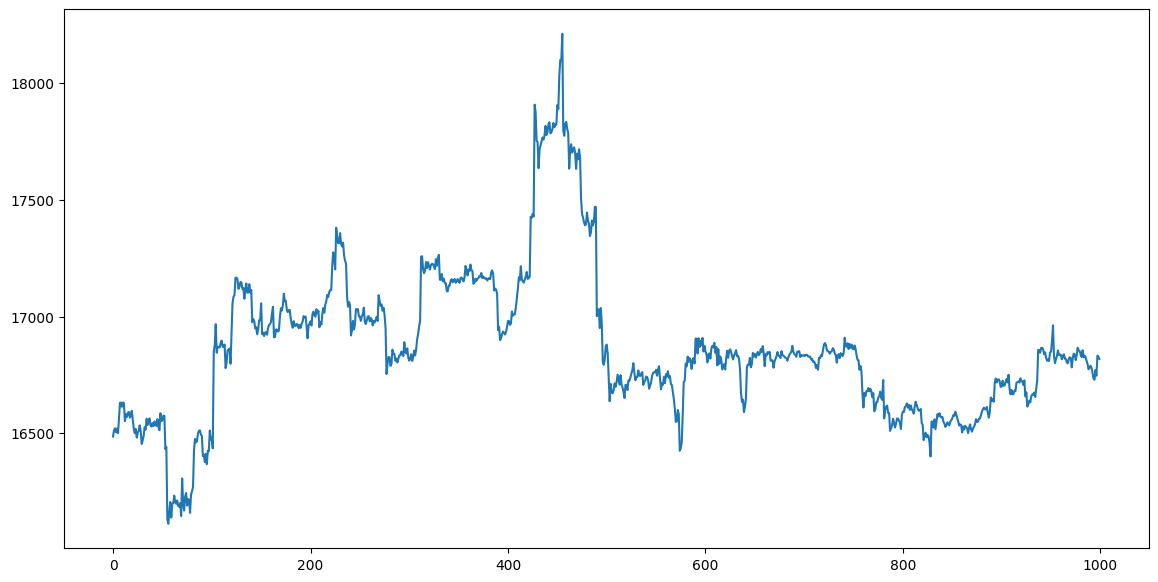

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import requests

# 选择要获取的数据时间段
periods = '3600'

# 通过Http抓取btc历史价格数据
resp = requests.get('https://api.cryptowat.ch/markets/gemini/btcusd/ohlc',
                    params={
                        'periods': periods
                    })
data = resp.json()

# 转换成 pandas data frame
df = pd.DataFrame(
    data['result'][periods],
    columns=[
        'CloseTime',
        'OpenPrice',
        'HighPrice',
        'LowPrice',
        'ClosePrice',
        'Volume',
        'NA'
    ]
)

# 输出 DataFrame 的头部几行
print(df.head())

# 绘制 btc 价格曲线
df['ClosePrice'].plot(figsize=(14, 7))
plt.show()
